In [1]:
!pip install jax jaxlib --upgrade

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax  import jit ,grad , random

In [3]:
k=random.PRNGKey(0)
nSample=100

In [4]:
x=random.uniform(k,shape=(nSample,))

In [5]:
trueW=2.0
trueB=0.75

In [6]:
y=trueW*x+trueB+random.normal(k,shape=(nSample,))

In [7]:
def predict (params,x):
  w,b=params
  return w*x+b

In [8]:
def loss(params,x,y):
  pred=predict(params,x)
  return jnp.mean((pred-y)**2)

In [9]:
lossGrd=grad(loss)
params=[jnp.array(0.0),jnp.array(0.0)]

In [10]:
lR=0.1
nIt= 1000

for i in range(nIt):
  grad=lossGrd(params,x,y)
  params=[p-lR*g for p, g in zip(params,grad)]

  if i%100==0:
    print("Current Loss",loss(params,x,y))

Current Loss 3.8477178
Current Loss 0.16192566
Current Loss 0.038532354
Current Loss 0.027549783
Current Loss 0.026572283
Current Loss 0.026485275
Current Loss 0.026477545
Current Loss 0.026476845
Current Loss 0.026476776
Current Loss 0.026476763


In [11]:
w,b=params
print(f"Trained Weights {w}")
print(f"Trained Bias {b}")

Trained Weights 5.32358980178833
Trained Bias -0.9114283919334412


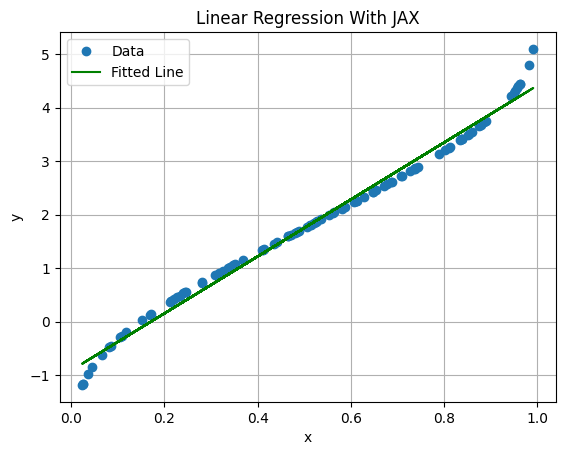

In [13]:
plt.plot(x,y,label='Data', marker='o', linestyle='none')
plt.plot(x,predict(params,x),color='green',label='Fitted Line')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression With JAX')
plt.grid(True)
plt.show()
